# Метод Ритца для одномерного дифференциального уравнения 

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# 1.Постановка:
$$-\frac{d^2u}{dx^2} =f , u'(0)=u'(1)=0, f=(x-1/2)$$

$$x\in [0,1]$$
В данной формулировке краевой задачи  мы видим, что  $$f \in C[0,1]$$ и так как дифференциальный оператор тривиальный, то можем решить задачу для $$u \in C^2[0,1]$$
Решение: $$-\frac{x^3}{6}+\frac{x^2}{4}+const$$ 
# 2.Рассуждение о переформулировке в задачу минимизации:
В чем же проблема? Ну действительно такая задача называется вырожденной задачей неймана и действительно по своим признакам она совпадает с определением данным в Лаевском. 
$\mathcal{D}_{A, \mathcal{N}}=\left\{u \in C^2(\bar{\Omega}), \quad \frac{\partial u}{\partial n}(\bar{x})=0, x \stackrel{\text { п.B. }}{\epsilon} \Gamma, \quad \int_{\Omega} u d \bar{x}=0\right\}$.

И не удивительно, что она имеет бесконечное кол-во решений, потому как при подставлении $$u=const$$:
$$\mathcal{L} u \equiv-\sum_{i, j=1}^m \frac{\partial}{\partial x_i}\left(a_{i j}(\bar{x}) \frac{\partial u}{\partial x_j}\right)+a_0(\bar{x}) u=f(\bar{x})=0$$

Отсюда в том числе и проистекает требование $f \in L_{2, \perp}(\Omega)$, которое в нашем случае выполняется

Поэтому с целью получения единственного решения мы выделяем $$H^{1}_{\perp}(0,1)$$  и переходим к интегральной формулировке.

# 3.Задача минимизации функционала:

$$\underset{v\in V_n}{\mathrm{argmin}}{F(v)}$$ 

где, $$F(v)=a(v,v)-2\left<f, v \right> $$

Соответственно, задача переходит в такую:
$$\begin{aligned} & F(v)=\int_0^1\left(v^{\prime}\right)^2 d x-2 \int_0^1\left(x-\frac{1}{2}\right) v d x, \\ & H_A=\left\{v \in H^1(0,1), \quad \int_0^1 v d x=0\right\} .\end{aligned}$$

# 4.Поиск предельно плотной последовательности
Можем попробовать рассмотреть такую последовательность $$V_{n}=\{cos(\pi kx)\}_{k=1}^{n}$$

Почему? - Потому что последоательность $\{1,sin(\pi kx),cos(\pi kx)\}_{k=1}^\infty$ - предельна плотна в $L_2(0,1)$,но 1 нет смысла использовать, так как $\int_{0}^{1} f*1 dx=0$ => следовательно матрица жесткости  $A$ в методе Галеркина таким образом приобретет 1 нулевой столбец и строку - станет вырожденной, ну и это нам говорит, что 1 нет в разложении по триг базису решения, $\int_{0}^{1} f*sin(\pi kx)dx=0$ => тоже не имеет смысла, так как соответствующие компоненты при поиске решения просто занулятся.v

$Av=f$ ~ $a(\phi_k,\phi_k)v_k=\left(f, \varphi_k\right)$ тогда получается:
$$ v_k\int_{0}^{1}(cos(\pi kx)^{\prime})^2 dx=\int_{0}^{1}f(x)cos(\pi kx)dx$$
$$v_k=\frac{\int_{0}^{1}f(x)cos(\pi kx)dx}{(\pi k)^2\int_{0}^{1}sin^2(\pi kx) dx}$$
$$v_k=\frac{\int_{0}^{1}(x-0.5)cos(\pi kx)dx}{(\pi k)^2 0.5}$$
$$v_k=\frac{2sin(\pi k)}{(\pi k)^3}+\frac{2(cos(\pi k)-1)}{(\pi k)^4}$$
$$u(x)=\overset{N}{\underset{k=1}{\Sigma}}v_k cos(\pi k x)$$


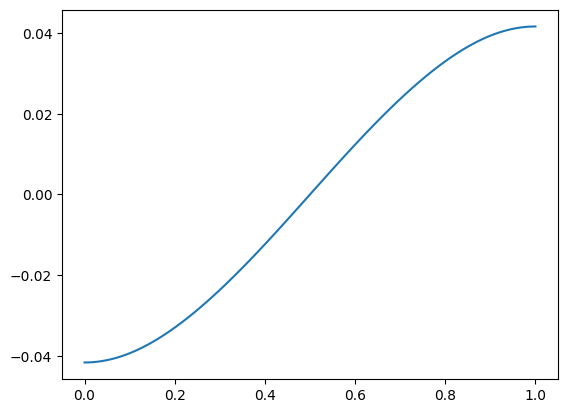

In [6]:
def u(N,x):
    s=0
    for k in range(1,N+1):
       s+=(2*np.sin(np.pi*k)/(np.pi*k)**3+2*(np.cos(np.pi*k)-1)/(np.pi*k)**4)*np.cos(np.pi*k*x)
    return s
x=np.linspace(0,1,100)
plt.plot(x,[u(5,i) for i in x])

    

Погрешность в $С[0,1]$:

In [13]:
m=0
for i in x:
  mm=abs(u(7,i)-(-i**3/6+i**2/4-1/24))
  if mm>m:
    m=mm
print(m)    

1.2970430608910677e-05


# 4.Полиномы Лежандра
Прежде всего можно заметить, что любой полином можно представить как линейную комбинацию полиномов Лежандра. С другой стороны у нас есть теорема Вейерштрасса, которая утверждает, что полиномы плотны в норме C в пространстве непрерыв-ных функций. Следовательно и полиномы Лежандра плотны в простран-стве непрерывных функций в норме $C$. Но кроме того мы знаем, что непре-рывные функции плотны в норме $L_2$ в пространстве $L_2$ и мы знаем, что норма C более сильная чем норма $L_2$, поэтому наша система полиномов Ле-жандра является плотной в пространстве $L_2[1, −1]$ в норме $L_2$. Но $L_2[1, −1]$ -гильбертово пространство и плотная ортогональная система в таком про-странстве является базисом. 

В качестве $V_n$ возьмем $Lin\{\widetilde{P_k}\}_{k=0}^{n}$,где $\widetilde{P_k}$ - сдвинутые полиномы Лежандра.


-Полиномы Лежандра:
$$P_n(z)=\frac{1}{2^n n !} \frac{d^n}{d z^n}\left(z^2-1\right)^n, \ z \in [-1,1]$$

-Формула для сдивнутых полиномов Лежандра
$$P_n(z(y))=P_n(2y-1)=\frac{1}{2^{2n} n !} \frac{d^n}{d y^n}\left((2y-1)^2-1\right)^n=\widetilde{P_n}(y), \ y \in [0,1]$$
-Несколько примеров:


$\begin{aligned} & P_0(x)=1, \\ & P_1(x)=x, \\ & P_2(x)=\frac{1}{2}\left(3 x^2-1\right), \\ & P_3(x)=\frac{1}{2}\left(5 x^3-3 x\right), \\ & P_4(x)=\frac{1}{8}\left(35 x^4-30 x^2+3\right), \\ & P_5(x)=\frac{1}{8}\left(63 x^5-70 x^3+15 x\right), \\ & P_6(x)=\frac{1}{16}\left(231 x^6-315 x^4+105 x^2-5\right), \\ & P_7(x)=\frac{1}{16}\left(429 x^7-693 x^5+315 x^3-35 x\right),\end{aligned}$

Создадим матрицу жесткости $$A$$ и $$F$$ - решим систему алгебраических уравнений

In [8]:
n_max=4
h=10000
c_xy=[tuple([0]*i+[1])for i in range(1,n_max+1)]
x=np.linspace(0,1,h+1)
dx=1/h
A=[[2*np.dot(np.polynomial.legendre.legval(2*x-1, np.polynomial.legendre.legder(i, m=1, scl=1, axis=0)),2*np.polynomial.legendre.legval(2*x-1,np.polynomial.legendre.legder(j, m=1, scl=1, axis=0) ))*dx for j in c_xy] for i in c_xy]
# (A)_(i,j) = integrate(phi_i'phi_j') dx - matrix

A=np.array(A).reshape(n_max,n_max)
print(np.linalg.det(A))
f=lambda x:x-1/2
F=[np.dot(f(x),np.polynomial.legendre.legval(2*x-1, i))*dx for i in c_xy]
V=np.linalg.solve(A,F)
print(V)


26923.034887526785
[ 5.00125004e-02 -1.76277751e-18 -8.33333375e-03  1.31854582e-18]


In [63]:
A@V-F

array([ 2.77555756e-17,  0.00000000e+00, -1.72930247e-17, -2.15704154e-32,
       -1.13570178e-17,  1.84889275e-32])

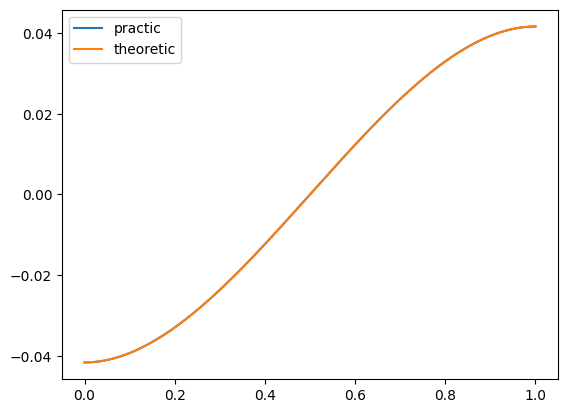

In [9]:
import matplotlib.pyplot as plt
plt.plot(x,np.polynomial.legendre.legval(2*x-1,[0]+[i for i in V]),x,-x**3/6+x**2/4-1/24)
plt.legend(["practic","theoretic"])
plt.show()


$L_{2,h}$ - норма

In [11]:
g=np.polynomial.legendre.legval(2*x-1,[0]+[i for i in V])
print(sum([(-x[i]**3/6+x[i]**2/4-1/24-g[i])**2 for i in range(len(V))])*dx)

6.246251707315794e-14


# 5.Матрица Масс для полиномов Лежандра

In [17]:
M=[[np.dot(np.polynomial.legendre.legval(2*x-1, j),np.polynomial.legendre.legval(2*x-1, i))*dx for i in c_xy] for j in c_xy]
M=np.array(M).reshape(n_max,n_max)
L=np.linalg.eig(M)[0]
print(max(L)/min(L))

2.998203389058638


Решение интегрального уравнения Фредгольма с помощью Галеркина:
$$u(x)=\int_0^1 k(x,y)u(y)dy + f(x)$$
$k(x,y)=x^{\alpha}(1-y)^{\beta}$
$f(x)=x^2$
$$u(x)=\overset{N}{\underset{k=0}{\Sigma}}a_k\phi_k(x)$$
$$a_m-\overset{N}{\underset{k=0}{\Sigma}}\gamma_{mk}a_k=(f,\phi_m)\   \ \ \ \forall m=1,..,N$$
$$\gamma_{mk}=\int_0^1\int_0^1 k(x,y)\phi_m(x)\phi_k(y)dydx$$


Идейное наполнение функции Integrate:


Для вычисления $\gamma_{mk}$ разобьем $[0,1]$ на $n-$точек $dx=dy=\frac{1}{n-1}$-длина каждого из $n-1$-кусочка

$$x_i=x_{i-1}+dx;y_i=y_{i-1}+dy$$
$$\vec{\phi_m}(x)=(\phi_m(x_1),\phi_m(x_2),..,\phi_m(x_n)),\vec{\phi_k}(y)=(\phi_k(y_1),\phi_k(y_2),..,\phi_k(y_n))^T$$
$$K=(k_{ij})_{ij}=(k(x_i,y_j))_{ij}$$
$$\gamma_{mk}\sim\vec{\phi_m}K\vec{\phi_k}h^2\sim h\vec{\phi_m}K\vec{\phi_k}h$$


Заметил что фишки ортоганальны и относительно ядра , разобраться с ортогональностью и прочим! потом

In [23]:


def integrate(k,x,y,i,j):# Берем интеграл с ядром
    h=1000
    K=[]
    for ii in x:
       k_=[] 
       for jj in y:
         k_.append(k(ii,jj))
       K.append(k_) # составляем матрицу K - k(x_i,y_j)
    xx=np.polynomial.legendre.legval(2*x-1,i)*(h/np.dot(np.polynomial.legendre.legval(2*x-1,i),np.polynomial.legendre.legval(2*x-1,i)))**0.5 # в качестве базисных функций берем полиномы лежандра сдивнутые на нужный отрезок + нормированные!!!
    yy=np.polynomial.legendre.legval(2*y-1,j)*(h/np.dot(np.polynomial.legendre.legval(2*y-1,j),np.polynomial.legendre.legval(2*y-1,j)))**0.5
    return xx@K@yy.transpose()
def Gamma(k,f,N):
    h=1000
    Gamma_=np.array([0  for i in range(N*N)],dtype=float).reshape(N,N)
    c_xy=[tuple([0]*i+[1])for i in range(0,N)]
    x=np.linspace(0,1,h+1)
    y=np.linspace(0,1,h+1)
    dx=1/h
    for i in c_xy:
        for j in c_xy:
             if (len(i)==len(j)):
                Gamma_[len(i)-1][len(j)-1]=1-integrate(k,x,y,i,j)*(dx)**2 
             else:    
                Gamma_[len(i)-1][len(j)-1]=-integrate(k,x,y,i,j)*(dx)**2
                #Gamma_[len(i)-1][len(j)-1]=0
                
            
    F=np.array([1  for i in range(N)],dtype=float).reshape(N,1)
    for i in c_xy:
      F[len(i)-1][0]=np.dot(np.polynomial.legendre.legval(2*x-1,i),f(x))/(h*(np.dot(np.polynomial.legendre.legval(2*x-1,i),np.polynomial.legendre.legval(2*x-1,i))/h)**0.5)
    return Gamma_,F  

        

In [46]:
x=np.linspace(0,1,1001)
y=np.linspace(0,1,1001)
k=lambda x,y:x*(1-y)
integrate(k,x,y,[1],[1])*10**-6

0.25050025

In [25]:
np.polynomial.legendre.legval(2*10-1,[0,1])

19.0

In [25]:
A

array([[ 7.49750000e-01,  1.44626315e-01, -5.58458539e-04,
         6.60993924e-04],
       [-1.44626315e-01,  1.08358350e+00, -3.22748453e-04,
         3.82006454e-04],
       [-5.58458539e-04,  3.22748453e-04,  9.99998754e-01,
         1.47507573e-06],
       [-6.60993924e-04,  3.82006454e-04, -1.47507573e-06,
         1.00000175e+00]])

In [21]:
print(F)

[[0.33366671]
 [0.28910811]
 [0.07546632]
 [0.00132133]]


In [24]:
N=4
k=lambda x,y:x*(1-y)
f=lambda x:x**2
A,F=Gamma(k,f,N)
V=np.linalg.solve(A,F)
print(V)     
   

[[0.38374114]
 [0.31804749]
 [0.07557806]
 [0.00145359]]


$u\left(x\right)=\frac{383}{1000}+\frac{159}{500}\sqrt{3}\left(2x-1\right)+\frac{5}{30}\left(6x^{2}-6x+1\right)=x^2+bx+c$


$g\left(x\right)=\int_{0}^{1}x\left(1-y\right)u\left(y\right)dy+x^{2}=x^2+ax$

$c=\frac{383}{1000}-\frac{159}{500}\sqrt{3}+\frac{1}{6}=-0.0011$

$a=\int_{0}^{1}\left(1-y\right)u\left(y\right)dy=0.0997013$

$b=\frac{318}{500}\sqrt{3}-1=0.1015843$

$|b-a|=0.102709803754$